# Introduction

This project is an analysis of the [Aviation Accidents dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) from the National Transportation Safety Board, which contains information on Aviation Accidents from 1962-2023 over the United States and International waters. The dataset does not contain any records from aviation accdients that occured in other locations. 

The purpose of this project is to determine which aircraft make and models are the most likely to suffer safety incidents in order to create a list of recommended aircraft based on safety for aviation startup stakeholders. The project will make recommendations about which aircraft are the overall most safe based on total injuries and fatalities, which aircraft perform the best in poor weather conditions, and which aircraft are the most likely to survive a crash with minor damage.

Now, let's get started working with the data!

# Step 1: import packages and read the CSV into memory

First things first, let's load up the data with pandas. We'll need to import all the packages we intend to use, and load our data into the memory of the notebook as a pandas dataframe. I've done all of this and also displayed a preview of the data in the cell below.

In [1]:
#import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#load csv as dataframe and display preview
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# Step 2: remove as many uncessary columns as possible

Next, we need to narrow the scope of our analysis to only what is relevant to the core business question. I did extensive exploration of the data before making a decision about which variables are relevant to my analysis, so it's most efficient for me to just drop the columns I don't plan to use right off the bat.

In [2]:
#drop all of the columns I do not plan to use in my analysis
df=df.drop(axis=1, labels=
        ['Investigation.Type', 'Accident.Number', 'Amateur.Built', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'Registration.Number', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Broad.phase.of.flight', 'Publication.Date', 'Report.Status']
       )

Now, let's get a general summary of the missing and duplicate values in the data.

In [3]:
#Display the total number of NaN entires in each column.
df.isna().sum()

Event.Id                   1459
Event.Date                 1459
Injury.Severity            2459
Aircraft.damage            4653
Make                       1522
Model                      1551
Number.of.Engines          7543
Engine.Type                8536
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
dtype: int64

In [4]:
### find total number of duplicate rows
df.duplicated().value_counts()

False    88846
True      1502
dtype: int64

# Step 3: Clean the data

## Dropping Duplicates
First, let's just remove all the duplicated records. This will be nice and easy!

In [5]:
#drop all duplicate rows and confirm there are no more duplicates
df = df.drop_duplicates()
df.duplicated().value_counts()

False    88846
dtype: int64

## Placeholders and Missing Values

### Event ID
Now, we need to remove or fill in the missing and placeholder values. I've determined that the best way to do this will be to just go through the relevant columns and decide how to handle them on a case-by-case basis. I don't plan to use Event ID as much other than a unique tracker of each case, so I won't be doing anything fancy with it - instead, I'm just going to drop the missing entries and call this one done.

In [6]:
#Remove all NaNs from Event Id
df=df.dropna(subset=['Event.Id'])

### Injury Severity
Next, I will work with the injury severity column. The data in this column is extremely irregular and redundant with other columns in the dataframe, but I think a simple fatal or non-fatal distinction is useful to me, so I will simplify it to that.

In [7]:
#Show the irregular data contained in this column
df['Injury.Severity'].value_counts().head(20)

Non-Fatal      67336
Fatal(1)        6165
Fatal           5262
Fatal(2)        3705
Incident        2211
Fatal(3)        1146
Fatal(4)         808
Fatal(5)         235
Minor            217
Serious          173
Fatal(6)         161
Unavailable       96
Fatal(7)          56
Fatal(8)          51
Fatal(10)         32
Fatal(9)          18
Fatal(14)         11
Fatal(11)         10
Fatal(13)          9
Fatal(12)          8
Name: Injury.Severity, dtype: int64

In [8]:
#This cell standardizes the non-fatal values and drops unkowns/NaNs.
df['Injury.Severity'] = df['Injury.Severity'].replace(to_replace=['Incident', 'Minor', 'Serious'], value='Non-Fatal')
df = df.drop(df[df['Injury.Severity'] == 'Unavailable'].index)
df.dropna(axis=0, subset=['Injury.Severity'], inplace=True)
df['Injury.Severity'].value_counts().head(20)

Non-Fatal    69937
Fatal(1)      6165
Fatal         5262
Fatal(2)      3705
Fatal(3)      1146
Fatal(4)       808
Fatal(5)       235
Fatal(6)       161
Fatal(7)        56
Fatal(8)        51
Fatal(10)       32
Fatal(9)        18
Fatal(14)       11
Fatal(11)       10
Fatal(13)        9
Fatal(12)        8
Fatal(20)        5
Fatal(15)        5
Fatal(18)        5
Fatal(25)        4
Name: Injury.Severity, dtype: int64

In [9]:
#This cell standardizes the Fatal entries based on their length. Anything longer than 5 characters is just set to 'Fatal'.
df['Injury.Severity'] = df['Injury.Severity'].map(lambda x: 'Fatal' if x[:5]=='Fatal' else x)

In [10]:
#Display the cleaned column
df['Injury.Severity'].value_counts()

Non-Fatal    69937
Fatal        17813
Name: Injury.Severity, dtype: int64

### Make and Model
The next two columns are the most important in the dataset. They will enable my analysis by allowing me to track the individual makes and models of the planes in the data, so that I can determine which ones are the safest.

In [11]:
#Now I need to handle the make and model columns. They are both categorical, do not have placeholder values, and only have a 
#small amount of missing values, which it will be convenient for me to just drop.

df['Make'].value_counts().head(20)

Cessna               22201
Piper                12016
CESSNA                4841
Beech                 4326
PIPER                 2814
Bell                  2116
Boeing                1530
Mooney                1092
Grumman               1091
BEECH                 1025
Robinson               941
Bellanca               886
Hughes                 794
BOEING                 720
Schweizer              627
Air Tractor            595
BELL                   570
Mcdonnell Douglas      515
Aeronca                486
Maule                  445
Name: Make, dtype: int64

In [12]:
df.dropna(axis=0, subset=['Make'], inplace=True)

In [13]:
df['Model'].value_counts().head(20)

152          2357
172          1742
172N         1161
PA-28-140     930
150           825
172M          797
172P          685
182           656
180           622
150M          585
PA-18         579
PA-18-150     578
PA-28-180     572
PA-28-161     569
PA-28-181     530
206B          521
PA-38-112     467
150L          461
G-164A        460
A36           450
Name: Model, dtype: int64

In [14]:
df.dropna(axis=0, subset=['Model'], inplace=True)

### Number of Engines
The number of engines will only feature in my analysis as a mechanism to guage the size of the individual airplanes. I do not think it will be a big deal if I cause a change in its summary statistics, so I will just fill with the median value, since the mean would be a decimal and inconsistent with the rest of the data.

In [15]:
print(df['Number.of.Engines'].value_counts().head(10))
print(df['Number.of.Engines'].mean())

1.0    69460
2.0    10847
0.0     1205
3.0      482
4.0      411
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64
1.143976992804184


In [16]:
#fillna with the median of the column
df['Number.of.Engines'].fillna(df['Number.of.Engines'].median(), inplace=True)

Now I need to check to see how that operation affected the data. It looks like it very slightly lowered the mean value by assuming all the NaNs were planes with 1 engine. This should be perfectly fine for my analysis, since I am working under the assumption that my stakeholders want to buy larger planes anyway, and most of these fabricated values will be ignored.

In [17]:
#print the value counts and mean of the data
print(df['Number.of.Engines'].value_counts().head(10))
print(df['Number.of.Engines'].mean())

1.0    74711
2.0    10847
0.0     1205
3.0      482
4.0      411
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64
1.1353524982888432


### Engine Type
Now it's time for something more difficult. The engine type column is categorical and has several different placeholder values which need to be dealt with. I cannot just drop them or fill with the mean or median, so I'm going to have to do something just a little bit more creative.

In [18]:
print(df['Engine.Type'].value_counts(normalize=True).head(10))

Reciprocating    0.852199
Turbo Shaft      0.044158
Turbo Prop       0.041323
Turbo Fan        0.028866
Unknown          0.024484
Turbo Jet        0.008554
None             0.000233
Electric         0.000098
LR               0.000025
NONE             0.000025
Name: Engine.Type, dtype: float64


In [19]:
df['Engine.Type'].value_counts()

Reciprocating      69438
Turbo Shaft         3598
Turbo Prop          3367
Turbo Fan           2352
Unknown             1995
Turbo Jet            697
None                  19
Electric               8
LR                     2
NONE                   2
Hybrid Rocket          1
Geared Turbofan        1
UNK                    1
Name: Engine.Type, dtype: int64

First, I will simply drop the none values, since they are such a small subset of the total. Then, I will fill the NaNs with the 'unknown' placeholder value to simplify the following steps. 

After filling in the missing values, I plan to employ a trick that I learned from the solution branch of the [DSC dealing missing data lab solution branch](https://github.com/learn-co-curriculum/dsc-dealing-missing-data-lab/tree/solution). The repository has five contributors who are all brilliant people - thank you for making this piece of programming so easy for me to find and use! It has a function that calculates the normal distribution of the values in a column, converts them each into a percentage of the total, and then feeds those percentages to a numpy random choose function in order to assign values randomly to the placeholders according to the normal distribution of the data. 

I like this method since it tends to have a very small effect on the summary statistics of the data. A major disadvantage of this technique which must be mitigated is its randomness; if I do not set a random seed before using these calls, my analysis will yield a different result every time.

In [20]:
#Standardize placeholder values
df['Engine.Type'] = df['Engine.Type'].loc[df['Engine.Type'] != 'NONE']
df['Engine.Type'] = df['Engine.Type'].loc[df['Engine.Type'] != 'None']
df['Engine.Type'].fillna(value='Unknown', inplace=True)
df['Engine.Type'].value_counts(normalize=True) 

Reciprocating      0.792129
Unknown            0.093486
Turbo Shaft        0.041045
Turbo Prop         0.038410
Turbo Fan          0.026831
Turbo Jet          0.007951
Electric           0.000091
LR                 0.000023
Hybrid Rocket      0.000011
Geared Turbofan    0.000011
UNK                0.000011
Name: Engine.Type, dtype: float64

Before anything else, it is highly important to set the numpy random seed for reproducability. I want to make sure the result is exactly the same every time this notebook is run, so I set the random seed in the cell below.

In [21]:
np.random.seed(42)

Next, I need to start defining functions so that I can easily re-use this process later. The first function needs to take a df and column as input. I also want to optionally be able to include a list of values to ignore/not calculate normals for so that I can exclude placeholders and outliers.

In [22]:
def get_norms(df, column, ignore=[]):
    '''
    Returns normalized value counts of the specified column in df. Ignore is a list of values to exclude from this calculation.
    '''
    c = dict(df[column].value_counts(normalize=True))
    for key in ignore:
        del c[key]
    return list(c.values())

In [23]:
remove_list = ['Unknown', 'Electric', 'LR', 'UNK', 'Geared Turbofan', 'Hybrid Rocket']
norms = get_norms(df, 'Engine.Type', remove_list)
norms

[0.7921286789869952,
 0.04104494638375542,
 0.03840976500114077,
 0.026830937713894592,
 0.007951174994296144]

Perfect, that works exactly how I want it to. I can give my function a dataframe and the column I want the normal distribution of, and it will return a list of the values. I can even give it a list of values I want it to exclude! As a consequence of me using that to exclude the placeholder values I plan to replace, I need to re-normalize these values so they can be used as percentage chances.

In [24]:
def get_probs(normal_list):
    '''
    Takes a list as an argument and returns normalized values.
    '''
    probabilities = []
    for number in normal_list:
        probabilities.append(number/sum(normal_list))
    return probabilities

In [25]:
norms = get_probs(norms)
norms

[0.8739616372149223,
 0.04528520364496803,
 0.04237778784675024,
 0.029602779036399334,
 0.008772592256960176]

Now, I need to write the function that fills in the placeholder values according to this distribution. 

In [26]:
def impute(value, choices, chances):
    '''
    If a given value is unknown, replace it with one of the choices given according to the probabilities given.
    '''
    if value == 'Unknown':
        return np.random.choice(choices, p=chances)
    else:
        return value

Now, I just need to map this function to each value in the engine type column using a lambda function, while feeding it the list of valid options for it to choose from ordered the same as their probabilities.

In [27]:
choice_list = ['Reciprocating', 'Turbo Shaft', 'Turbo Prop', 'Turbo Fan', 'Turbo Jet'] #hard-coded list of values

df['Engine.Type'] = df['Engine.Type'].map(lambda x: impute(x, choice_list, norms))

In [28]:
df['Engine.Type'].value_counts(normalize=True)

Reciprocating      0.874104
Turbo Shaft        0.045038
Turbo Prop         0.042380
Turbo Fan          0.029660
Turbo Jet          0.008670
Electric           0.000091
LR                 0.000023
Hybrid Rocket      0.000011
Geared Turbofan    0.000011
UNK                0.000011
Name: Engine.Type, dtype: float64

It looks like that worked exactly how I wanted it to! This definitely has a smaller effect on the column than just dropping the 5% of values that are missing would, with the trade-off of being more random. There are definitely records in the data that represent real aircraft which I have filled in with an inaccurate engine type using this method; although this would have been a consequence of any method I used to fill in the blanks. Next, I'll be making heavy usage of those functions I just defined to standardize the next four columns.

### Total Fatal Injuries

My original plan for the injury totals is to fill all NaN values with 'Unknown', and then apply the functions I just wrote to them in the same way to preserve the summary statistics while filling in the missing values. Unfortunately, upon running my analysis for the first time, I have discovered that filling the data in this way actually seems to show a larger effect in the results than the actual data. In addition to this, I was experiencing an issue where my results were not reproducible, even after setting the numpy random seed to a specific value. On reflection, I think that in order to prioritize the reproducability of my results, I need to remove this randomness from my methods. 

Instead, I think it's okay to just drop the missing values in this column, even though there are a whole lot of them - I would rather be missing data than recommend airplanes to investors because they won a random dice and had all of their missing entries filled with zero fatalities.

For Total Fatal Injuries column, I think my best choice is legitimately to just drop the ~10% of incidents that are missing information. I really do not want to misconstrue a non-fatal crash as fatal, or the other way around.

In [29]:
df=df.dropna(subset=['Total.Fatal.Injuries'])

Perfect, it looks like that went off without a hitch, and had a minimal effect on summary statistics! I need to make sure there are not any NaN values left after that, and then I will repeat the same process for the next three columns.

In [30]:
df['Total.Fatal.Injuries'].isna().any()

False

### Total Serious Injuries

These next two columns are not as critically important to the safety ratings I will give to the aircraft I intend to recommend, so I will be filling their missing values with the median. This will cause a bigger change in summary statistics, but since the only way I intend to use these columns is to calculate an estimate of the total number of passengers on a given flight, I will accept that I am trading a bigger change in summary statistics in exchange for a reduction in randomness by not using the normal distribution method.

In [31]:
df['Total.Serious.Injuries'].fillna(value=df['Total.Serious.Injuries'].median(), inplace=True)

### Total Minor Injuries

I have the same intention for this column. It will not serve any function in my analysis other than to estimate the average number of passengers on a given flight for a given aircraft, so I believe it is justifiable to just fill the missing results with the median value.

In [32]:
df['Total.Minor.Injuries'].fillna(value=df['Total.Minor.Injuries'].median(), inplace=True)

### Total Uninjured

The total uninjured column is missing significantly fewer values than the other passenger totals. The addition of random noise to these records shouldn't have an affect on the end result of my analysis, so I'm going to use the numpy.random.choose function for it.

In [33]:
print(df['Total.Uninjured'].value_counts(normalize=True).sort_values().tail(10))

9.0    0.001431
8.0    0.001785
7.0    0.003162
6.0    0.005765
5.0    0.010221
4.0    0.031277
3.0    0.049389
2.0    0.181447
1.0    0.288987
0.0    0.392712
Name: Total.Uninjured, dtype: float64


This column has a wide distribution of common values, so I will distribute the NaNs across all the categories that make up at least 1% of the total. (In this case, 1-5). 

In [34]:
norms = get_norms(df, 'Total.Uninjured')
del norms[6:]
norms

[0.39271161263066084,
 0.288987012279052,
 0.18144650230998816,
 0.0493887730487755,
 0.03127683061449773,
 0.010221186475326056]

In [35]:
choice_list = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
df['Total.Uninjured'].fillna(value='Unknown', inplace=True)
df['Total.Uninjured'] = df['Total.Uninjured'].map(lambda x: impute(x, choice_list, get_probs(norms)))
df['Total.Uninjured'].value_counts(normalize=True).sort_values().tail(10)

9.0    0.001375
8.0    0.001715
7.0    0.003038
6.0    0.005539
5.0    0.010123
4.0    0.031088
3.0    0.049579
2.0    0.181803
1.0    0.289996
0.0    0.393240
Name: Total.Uninjured, dtype: float64

I believe that I have solved my reproducability issue by reducing the random noise that I add to these columns. I also might consider making the code a little more dry by writing a function that contains the calls I ran in the previous two cells.

### Aircraft Damage

I was originally re-using the numpy choice function here as well, but investigated further and found that it was changing the outcome of my analysis. There's only 4000 NaNs in this column, so on second thought, I think it would be smarter to just drop them. There are also a few placeholder values, which I am going to set to the Median of the column for a little extra cleanliness.

In [36]:
df['Aircraft.damage'].dropna(inplace=True)

In [37]:
df.loc[df['Aircraft.damage'] == 'Unknown', 'Aircraft.damage'] = 'Substantial'

In [38]:
df['Aircraft.damage'].value_counts()

Substantial    54205
Destroyed      17865
Minor           2108
Name: Aircraft.damage, dtype: int64

### Total Passengers Column

Now, I want to add a new column to the dataframe to help my analysis: a sum of all the different injury type columns and the uninjured column that represents the total number of passengers on each plane at the time of the incident.

This is particularly important for my analysis, because I am working with the assumption that incidents are bound to happen. The safest plane is the one that has the smallest amount of casualties in the event of a safety incident.

In [39]:
#Simply adding all four columns together on every row
df['Total.Passengers'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries'] + df['Total.Uninjured']

### Total Injuries Column

I also realized that the total number of injuries of any type would be useful to my analysis, so I create that column here.

In [40]:
#Exactly the same as above but without uninjured passengers
df['Total.Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']

### Weather Condition

This is a column I believe it is acceptable to use the random choice function to fill. I tested with multiple different seeds and found that the effect was not large enough to change the outcome of my analysis.

In [41]:
df['Weather.Condition'].value_counts(normalize=True)

VMC    0.910318
IMC    0.076226
UNK    0.010215
Unk    0.003241
Name: Weather.Condition, dtype: float64

I plan to use this column in my analysis, so I want to make sure the data is accurate. I will re-distribute the placeholder and NaN values according to the ratio of VMC/IMC in order to preserve the summary statistics as much as possible.

In [42]:
df['Weather.Condition'].fillna(value='Unknown', inplace=True)
df.loc[df['Weather.Condition'] == 'UNK', 'Weather.Condition'] = 'Unknown'
df.loc[df['Weather.Condition'] == 'Unk', 'Weather.Condition'] = 'Unknown'
df['Weather.Condition'].value_counts(normalize=True)

VMC        0.871718
IMC        0.072993
Unknown    0.055289
Name: Weather.Condition, dtype: float64

In [43]:
remove_list = ['Unknown']
norms = get_norms(df, 'Weather.Condition', remove_list)
norms

[0.8717179786022027, 0.07299346542173565]

In [44]:
choice_list = ['VMC', 'IMC']
df['Weather.Condition'] = df['Weather.Condition'].map(lambda x: impute(x, choice_list, get_probs(norms)))
df['Weather.Condition'].value_counts(normalize=True)

VMC    0.922476
IMC    0.077524
Name: Weather.Condition, dtype: float64

Perfect! That was the last column I needed to clean, so all that's left to do before we start the analysis is a little bit of housekeeping. I have two more columns to add which will be very important to my analysis.

The first combines the make and model columns to make it easier to sort the dataframe by types of aircraft. We typically think of the individual aircraft as a combination of make and model, so it makes sense for my data to represent that. 

The second column is simply the total number of fatalities divied by the total number of passengers in each given incident, and it represents the chance that you would sustain a fatal injury if you were a passenger on that given flight. Later in the analysis I will take the average of this value for each aircraft to represent the general likilihood of dying on it based on the limited data in this dataset.

In [45]:
# Add a new column that combined make and model to simplify the code I will use in my analysis
df['Make&Model'] = df['Make'] + ' ' + df['Model']

In [46]:
# Add a new column that calculates the ratio of the mean of total fatal injuries per make and model to total passengers
df['Fatality.Ratio'] = df['Total.Fatal.Injuries']/df['Total.Passengers']
df['Fatality.Ratio'].value_counts()

0.000000    58529
1.000000    13050
0.500000     1977
0.333333      671
0.666667      527
            ...  
0.684211        1
0.990476        1
0.147059        1
0.172932        1
0.010526        1
Name: Fatality.Ratio, Length: 208, dtype: int64

## Step 4: statistical analysis

My goal in this project is to give three concrete recommendations to stakeholders about which makes/models of plane are the best investment from a safety perspective. One of the biggest issues with investing in planes are the safety risks associated with it; if a plane is destroyed in a crash, you are not only down the money you spent on the plane, but you also have an expensive disaster to clean up. It is in the best interest of the shareholder to purchase only the most safe planes to avoid these hidden costs of the investment, since safety incidents are unfortunately common. In the event that the plane you have invested in is in a crash, you want to make sure that the crash is as minor and harmless as possible to minimize the financial damage. The three questions I will answer to address this issue in my analysis are:
1. What are the top 5 commercial-grade aircraft that have the lowest average rates of fatalities and injuries in the event of an accident?
2. Of those top 5 aircraft, which one performs the best in IMC (instrument driven only) flight conditions?
3. Of those top 5 aircraft, which plane tended to take the least damage during an incident?

### 1. Lowest fatality and injury rate among large planes

The dataset has two major challenges that I need to address before I can give advice tailored to the specific business needs of the shareholders:
1. A large amount of the makes/models in the dataset are consumer grade aircraft that are simply not relevant to the business needs of the shareholders. Some makes/models are actually helicopters, which are completely irrelevant to my analysis.
2. Many makes/models in the dataset have only 1-5 records. This may be because they are safer, or it may be because there are less of these planes in the air. They also may have experienced more crashes than are shown in this data. 

I have come up with a way to address both of these issues that I think is reasonable.
1. Commercial aircraft typically have two or more engines; in fact, according to [simpleflying.com](https://simpleflying.com/why-single-jet-commercial-aircraft-arent-just-around-the-corner/#:~:text=One%20smaller%20aircraft%20designer%20has,by%20a%20Williams%20FJ33%20turbofan.), the only single engine commericial passenger aircraft on the market is the The Cirrus Vision SF50, certified in 2016. In addition, there are many records for helicoptors, hot air baloons, and other aircraft which are irrelevant to my analysis that have 0-1 engines in the data. For this reason, it will be easiest for me to just group by number of engines and exclude all makes and models that have less than two.
2. To ensure that I am not making assumptions based on a small sample size, I will exclude all makes and models whoose number of records is less than 10. This is an arbitrary limit, and it will have a serious effect on the outcome of the analysis. However, it is my best option - Excluding outliers based on standard deviations or IQR would not be satisfactory for my needs. They would dictate that I include all aircraft with above 4 records, and I am of the opinion that 4 incidents are not enough for me to make a statistical judgement about the safety of an aircraft. For these reasons, I am confident in my arbitrary floor of 10 incidents.

Another important detail to mention is that small number of incidents could mean two things: There are either not many of the aircraft/the aircraft is new and has not had enough airtime to have many incidents on record (I want to exclude these), or the aircraft is extremely safe and does not have many safety incidents (very difficult to prove). I am confident that setting this arbitrary limit to exclude these edge cases will allow me to make the overall best recommendation based on statistics.

This piece of code generates the average number of total fatalities for each make and model.

In [48]:
# Group dataframe by make&model and number of engines, then calculate the mean number of fatalities for each. 
avg_fatalities = df.groupby(['Make&Model', 'Number.of.Engines'])['Total.Fatal.Injuries'].mean()
# Reset index to change object back to a dataframe
avg_fatalities = avg_fatalities.reset_index()
avg_fatalities

,Make&Model,Number.of.Engines,Total.Fatal.Injuries
0,107.5 Flying Corporation One Design DR 107,1.0,1.0
1,177MF LLC PITTS MODEL 12,1.0,0.0
2,1st Ftr Gp FOCKE-WULF 190,1.0,1.0
3,2000 Mccoy Genesis,1.0,1.0
4,2007 Savage Air LLC EPIC LT,1.0,0.0
...,...,...,...
18332,de Havilland DHC-2 MK I,1.0,2.0
18333,de Havilland DHC-3,1.0,0.0
18334,de Havilland DHC-6-200,2.0,0.0
18335,de Havilland DHC-8-202,2.0,0.0


This piece of code calculates the mean total of injuries per incident for each aircraft.

In [49]:
# Exact same code as above, but for serious injuries instead of fatal injuries
avg_total_injuries = df.groupby(['Make&Model', 'Number.of.Engines'])['Total.Injuries'].mean()
avg_total_injuries = avg_total_injuries.reset_index()
avg_total_injuries

,Make&Model,Number.of.Engines,Total.Injuries
0,107.5 Flying Corporation One Design DR 107,1.0,1.0
1,177MF LLC PITTS MODEL 12,1.0,2.0
2,1st Ftr Gp FOCKE-WULF 190,1.0,1.0
3,2000 Mccoy Genesis,1.0,1.0
4,2007 Savage Air LLC EPIC LT,1.0,0.0
...,...,...,...
18332,de Havilland DHC-2 MK I,1.0,5.0
18333,de Havilland DHC-3,1.0,0.0
18334,de Havilland DHC-6-200,2.0,0.0
18335,de Havilland DHC-8-202,2.0,2.0


This piece of code cacluates the total number of incidents each aircraft has been in.

In [50]:
# Find the total number of incidents for each make/model and group with the same structure.
total_incidents = df.groupby(['Make&Model', 'Number.of.Engines']).size()
# return object to df format
total_incidents = total_incidents.reset_index()
total_incidents

,Make&Model,Number.of.Engines,0
0,107.5 Flying Corporation One Design DR 107,1.0,1
1,177MF LLC PITTS MODEL 12,1.0,1
2,1st Ftr Gp FOCKE-WULF 190,1.0,1
3,2000 Mccoy Genesis,1.0,1
4,2007 Savage Air LLC EPIC LT,1.0,1
...,...,...,...
18332,de Havilland DHC-2 MK I,1.0,1
18333,de Havilland DHC-3,1.0,1
18334,de Havilland DHC-6-200,2.0,1
18335,de Havilland DHC-8-202,2.0,1


Now that we have created the statistics we need to make the first recommendation, it's time to put them all together in a new dataframe and determine which planes have the most favorable statistics.

In [51]:
# Create a new column in one of the dataframes that is the ratio of avg fatal injuries per crash to the total number of incidents
# for each make and model.
avg_fatalities['Fatal.Ratio'] = avg_fatalities['Total.Fatal.Injuries']/total_incidents[0]

# Add the total number of incidents from the other DF to this one as a new column
avg_fatalities['Total.Incidents'] = total_incidents[0]

# Exclude all records of aircraft with less than two engines
avg_fatalities = avg_fatalities[avg_fatalities['Number.of.Engines'] >= 2]

# Move the lowest and most favorable ratios to the top of the list so it is easier to grab them
avg_fatalities = avg_fatalities.sort_values(by='Fatal.Ratio')

# Exclude every make and model combination that has less than 10 total records
avg_fatalities = avg_fatalities[avg_fatalities['Total.Incidents'] >= 10]

avg_fatalities['Total.Injuries'] = avg_total_injuries['Total.Injuries']

# Display the top 20 aircraft that meet all of these criteria 

avg_fatalities = avg_fatalities.sort_values(by=['Fatal.Ratio', 'Total.Injuries']).head(20)
avg_fatalities

,Make&Model,Number.of.Engines,Total.Fatal.Injuries,Fatal.Ratio,Total.Incidents,Total.Injuries
3668,Boeing 727-100,3.0,0.000000,0.000000,10,0.200000
3847,Boeing 757,2.0,0.000000,0.000000,10,0.300000
2331,BOMBARDIER INC CL-600-2B19,2.0,0.000000,0.000000,15,0.333333
2232,BOEING 777,2.0,0.000000,0.000000,11,0.363636
3856,Boeing 757-232,2.0,0.000000,0.000000,12,0.416667
4640,CESSNA 402C,2.0,0.000000,0.000000,15,0.466667
8948,Grumman G-44,2.0,0.000000,0.000000,12,0.500000
15863,Saab-scania Ab (saab) 340B,2.0,0.000000,0.000000,10,0.500000
3729,Boeing 737,2.0,0.000000,0.000000,30,0.733333
2148,BOEING 737-7H4,2.0,0.000000,0.000000,12,0.833333


Great! We've cut out the irrelevant records to this analysis and re-organized them according to which ones are the safest to be in during a crash. As you can see, the safest planes in this dataset do not have any fatalities on record, so we can assume the safest plane will probably have a fatal ratio of 0.0, so we can narrow our frame of attention and decide based on the number of total injuries. Now, let's make a visualization of this result!

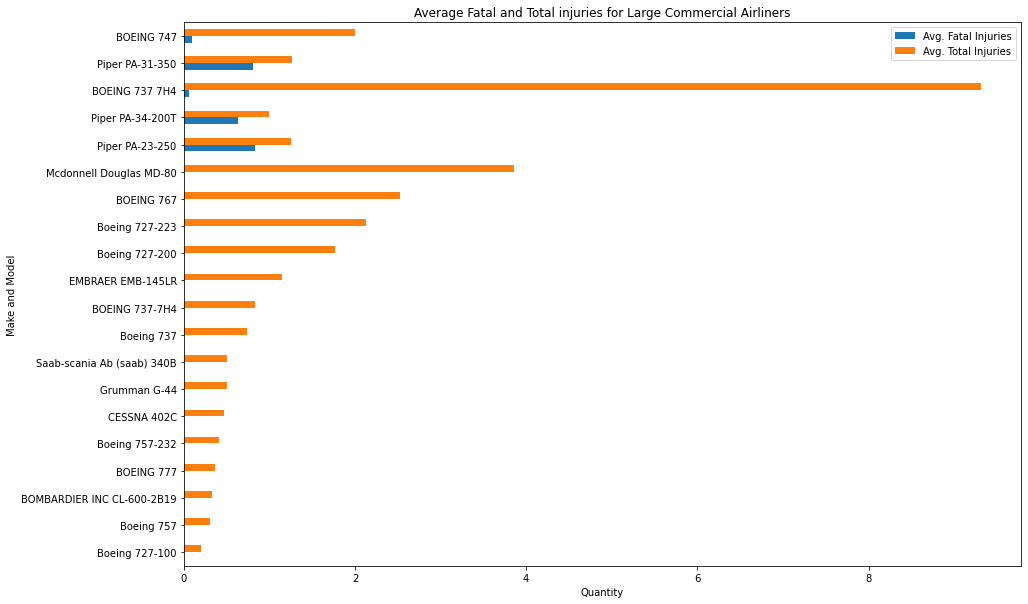

In [52]:
ax = avg_fatalities.plot.barh(y=['Total.Fatal.Injuries', 'Total.Injuries'], figsize=(15,10), xlabel='Make and Model', ylabel='Quantity')
ax.set_yticklabels(avg_fatalities['Make&Model'])
ax.set_xlabel('Quantity')
ax.set_title('Average Fatal and Total injuries for Large Commercial Airliners')
ax.legend(labels=['Avg. Fatal Injuries', 'Avg. Total Injuries']);

This graph shows a comparison of average total injuries per incident vs average fatal injuries per incident for the top 20 aircraft with the lowest values for each. We can safely ignore the entries that have a nonzero value for fatalities. Organized by chances of any given passenger sustaining an injury, the top five safest aircraft are:

1. Boeing 727-100

2. Boeing 757

3. Bombardier Challenger 600 series jets

4. Boeing 777

5. Boeing 757-232


These are all excellent choices for investment due to their fatality-free safety record and low average numbers of injury during a crash. This implies that these planes have effective safety features that keep passengers protected in the event of a safety incident.

### 2. Performance during poor weather conditions

For the next two analyses, I will focus in on those top 5 safest planes in an attempt to determine which one is the overall safest by considering other factors. First, I will focus on their performance in poor weather conditions. The outcome of this analysis will show us the efficacy of the instrumental systems of these aircraft. If you are a pilot flying in poor conditions, the last thing you want to be dealing with are failing instruments.

In [54]:
# I use the pandas .isin function to slice the dataframe to just the records relating to the planes I already determined were the top 5. Then, I display the new DF to make sure everything is working as intended.
top5 = ['Boeing 727-100', 'Boeing 757', 'BOMBARDIER INC CL-600-2B19', 'BOEING 777', 'Boeing 757-232']
top5df = df.loc[df['Make&Model'].isin(top5)]
top5df

,Event.Id,Event.Date,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Total.Passengers,Total.Injuries,Make&Model,Fatality.Ratio
4735,20001214X43089,1983-05-20,Non-Fatal,Substantial,Boeing,727-100,3.0,Turbo Fan,0.0,0.0,0.0,52.0,VMC,52.0,0.0,Boeing 727-100,0.0
11179,20001214X35863,1985-03-24,Non-Fatal,NaN,Boeing,727-100,3.0,Turbo Jet,0.0,0.0,1.0,130.0,VMC,131.0,1.0,Boeing 727-100,0.0
13113,20001214X37767,1985-09-29,Non-Fatal,Minor,Boeing,727-100,3.0,Turbo Fan,0.0,0.0,0.0,71.0,VMC,71.0,0.0,Boeing 727-100,0.0
13512,20001214X38220,1985-11-26,Non-Fatal,Minor,Boeing,727-100,3.0,Turbo Jet,0.0,0.0,0.0,111.0,VMC,111.0,0.0,Boeing 727-100,0.0
19898,20001213X25329,1988-03-22,Non-Fatal,NaN,Boeing,757,2.0,Turbo Fan,0.0,0.0,0.0,99.0,VMC,99.0,0.0,Boeing 757,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89364,20220623105316,2022-06-14,Non-Fatal,Minor,BOEING,777,1.0,Reciprocating,0.0,0.0,0.0,183.0,VMC,183.0,0.0,BOEING 777,0.0
89752,20220808105684,2022-08-06,Non-Fatal,Substantial,BOEING,777,1.0,Reciprocating,0.0,0.0,0.0,2.0,VMC,2.0,0.0,BOEING 777,0.0
90049,20220929106019,2022-09-28,Non-Fatal,Substantial,BOEING,777,1.0,Reciprocating,0.0,0.0,0.0,2.0,VMC,2.0,0.0,BOEING 777,0.0
90062,20221003106034,2022-10-01,Non-Fatal,Minor,BOEING,777,1.0,Reciprocating,0.0,0.0,0.0,368.0,VMC,368.0,0.0,BOEING 777,0.0


In [55]:
# This code generates a grouped pivot which shows the sum total of injuries sustained under each weather condition. Higher values are worse.
top5weather = top5df.groupby(['Make&Model', 'Weather.Condition']).sum()
top5weather = top5weather.reset_index()
top5weather = top5weather.pivot(index='Make&Model', columns='Weather.Condition', values='Total.Injuries')
top5weather

Weather.Condition,IMC,VMC
Make&Model,,
BOEING 777,3.0,38.0
BOMBARDIER INC CL-600-2B19,2.0,3.0
Boeing 727-100,NaN,2.0
Boeing 757,0.0,117.0
Boeing 757-232,2.0,3.0


Two of these makes and models have not had any safety incidents that resulted in injuries in instrumental meteorological conditions. This does not necessarily make them more safe, it just means I do not have enough data to make a ruling on them one way or the other. Let's visualize these results!

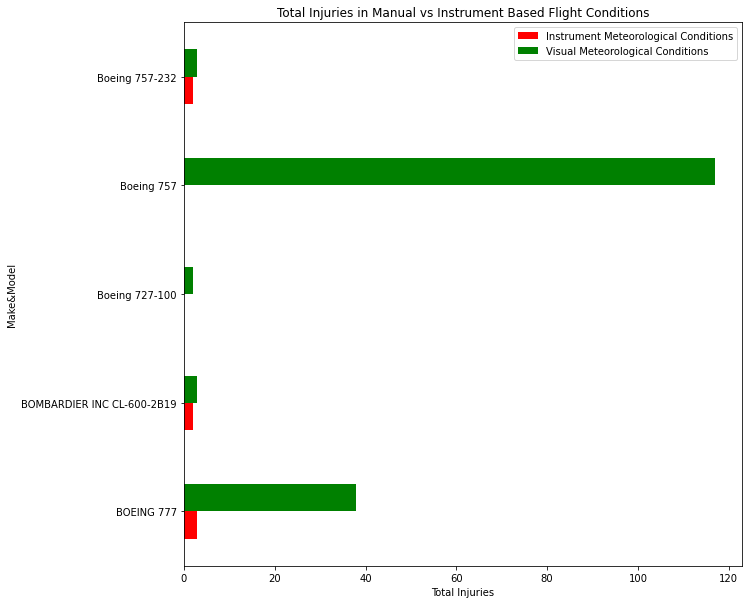

In [56]:
# Create a grouped barplot of the pivot
ax = top5weather.plot.barh(figsize = (10,10), color=['red', 'green'])
ax.set_xlabel('Total Injuries')
ax.set_title('Total Injuries in Manual vs Instrument Based Flight Conditions')
ax.legend(labels=['Instrument Meteorological Conditions', 'Visual Meteorological Conditions']);

This graph demonstrates the fact that the vast majority of aircraft incidents happen during visual meteorological conditions, where the pilots are able to see outside of the aircraft and are flying the vehicle manually. There is a general trend in the data of these five planes that shows them having more incidents while the plane is under manual control than automatic control. 

In fact, two of the planes, the 757 and 727-100, do not have any records of incidents in IMC conditions. This data is likely incomplete; there are almost certainly situations where all of these extremely common commerical aircraft have had an incident during poor weather conditions in countries other than America. For this reason, I cannot definitively say that these planes have better instruments than those that have incidents in poor conditions.

The Boeing 777 is a large commercial aircraft with high passenger capacity, so it makes sense that it has a high average number of injuries in the event of an accident - there are more people on the plane to get injured. This does not necessarily make it more dangerous. On this graph, I am specifically looking for planes that have a lower rate of injury during IMC conditions than VMC conditions, and the 777 actually has the most favorable ratio!

The Bombardier CL-600 and Boeing 757-232 are also standout candidates in this analyis. The data implies that they have instruments which lower the risk of passengers being injured in the event of a crash, although the effect is not as significant as it is in the 777.

To summarize, the data supports the conclusion that the Bombardier CL-600, Boeing 757-232, and particularly the Boeing 777 have instruments that effectively reduce the liklihood of injuries in the event of a safety incident in poor weather.

### 3. Damage Sustained During Crashes

In my final analysis, I will look at the totals of different categories of damage sustained by the aircraft in safety incidents and use this information to break the tie between the Boeing 777 and Bombardier CL-600. This analysis will allow us to determine which of the top 5 planes is least likely to be destroyed/need major repairs in the inevitabal event of a safety incident.

In [58]:
# Create a new grouped pivot table that has a count of how many times each category of aircraft damage appears associated with each make and model.
top5damagedf = top5df.groupby(['Make&Model', 'Aircraft.damage']).size()
top5damagedf = top5damagedf.reset_index()
top5damagedf = top5damagedf.pivot(index='Make&Model', columns='Aircraft.damage', values=0)
top5damagedf

Aircraft.damage,Destroyed,Minor,Substantial
Make&Model,,,
BOEING 777,1.0,16.0,6.0
BOMBARDIER INC CL-600-2B19,NaN,6.0,5.0
Boeing 727-100,NaN,5.0,2.0
Boeing 757,2.0,1.0,5.0
Boeing 757-232,NaN,4.0,3.0


This looks great, we have a table that shows us the total of each category for each aircraft. Some aircraft have not ever had an incident where they were destroyed, which is interesting and useful to my analysis.

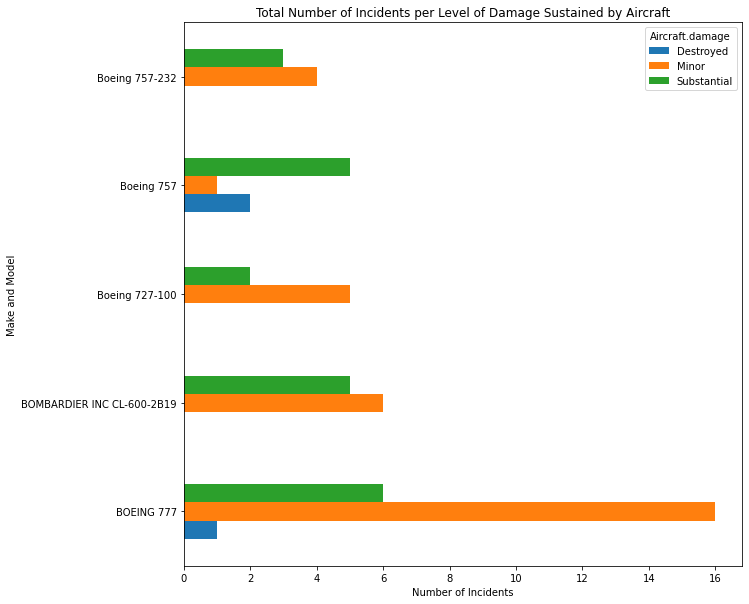

In [59]:
ax = top5damagedf.plot.barh(figsize=(10,10))
ax.set_xlabel('Number of Incidents')
ax.set_ylabel('Make and Model')
ax.set_title('Total Number of Incidents per Level of Damage Sustained by Aircraft');

There are several things about this chart that immediately need to be acknowledged. These values are not averages; they are sum totals. We are not interested in the absolute size of the bars due to the variable number of records for each make and model, instead, we are interested in the relative size of the bars. Planes that are more common necessarily have more records, and have a higher chance of experiencing at least one destruction. 

Another fact that must be acknowledged is that the incompleteness of the data. As previously mentioned, this data is only for planes that crashed over international waters or in America - these planes have likely been destroyed in a crash somewhere else. While we cannot make the assumption that they have a 0% chance of being destroyed, we can still assume that these planes are relatively safe.

The most interesting analysis we can make is concerned with the Boeing 777. It has a lot of instances where the plane was damaged in a crash, which makes sense. It is one of the most common airplanes in existence, after all. The ratio of times the plane took minor damage in a crash to the times it was destroyed or substantially damaged is huge compared to every other plane on this list, except for the Boeing 727-100. Both of these planes have a small amount of destructions - especially the 727-100, which has experienced none. While this result is promising for this aircraft, we must keep in mind that there are other sub-varieties of 727 in the data that make this result less accurate.

Despite some poential stumbling points, I believe that this chart accurately predicts that the Boeing 777 and 727-100 are the least likely to be destroyed in a crash. This effect could potentially be explained by the large size of these planes. Investors that are concerned about the real risk of losing their entire investment in a plane crash should purchase these planes.

## Conclusion

Based on my three statistical analyses, I believe that the Boeing 777 is the best overall choice for aviation investors to consider. It a low chance of being destroyed in the event of a crash, a history with a low total amount of injuries and no fatalities, and has low number of incidents involving instrumental meteorological conditions in its history. This is one of the most common commercial airliners for a very good reason - they have best in class safety, extremely high capacity, high top speeds, and have been trusted by consumers to deliver them safely to their destination for many years. Consumer trust is not a factor which should be underrated, either - after all, consumers are the most important shareholders of all!

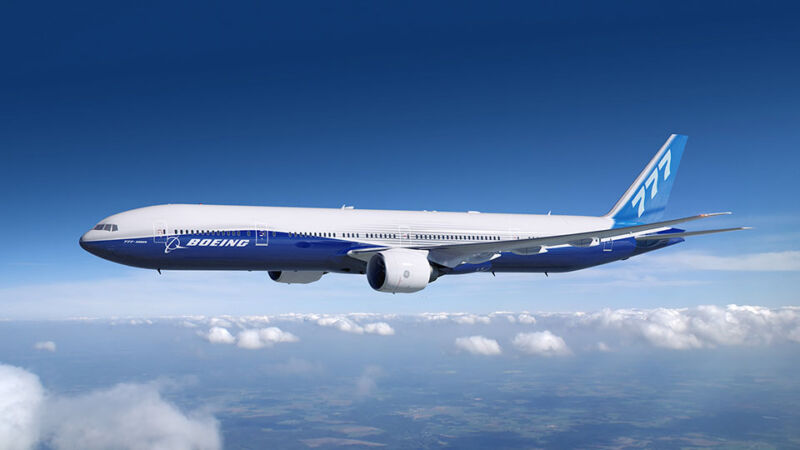 [Image source](https://arstechnica.com/tech-policy/2022/01/faa-clears-62-of-us-planes-for-low-visibility-landings-amid-5g-rollout/)